In [1]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import matplotlib.cm as cm
pd.options.display.max_columns = 1200
pd.options.display.max_rows = 1200

In [2]:
df = pd.read_csv('data/composed/mira_top_10.csv', low_memory=False)

In [3]:
# df.dropna(inplace=True)
# for cols in df.columns:
#     print(cols)

In [4]:
df.sample(frac=1);

In [5]:
df.zero_execName.unique()

array(['pibis', 'nek5000', 'aims.071914_7.scalapack.mpi.x', 'runMantona',
       'vof.exe', 'charles.exe', 'cpmd_3.17.1.dat', 'fdl3di.exe',
       'cesm.exe', 'mcfm_omp', 'hello'], dtype=object)

In [6]:
df.USED_CORE_HOURS.sum()

14446519321.088503

In [7]:
df.WALLTIME_SECONDS = df.WALLTIME_SECONDS / 3600
df.RUNTIME_SECONDS = df.RUNTIME_SECONDS / 3600

In [8]:
# %matplotlib inline
# # plt.scatter(result.name, result.t_std / result.t_mean)
# for i in range(9):
# #     print(df[df.zero_execName == df.zero_execName.unique()[i]].zero_elapsedTime.describe())
#     fig = plt.figure()
#     plt.hist(df[df.zero_execName == df.zero_execName.unique()[i]].zero_elapsedTime, bins=20);
#     plt.title(df.zero_execName.unique()[i])
# # plt.hist(df[df.zero_execName == 'pibis'][df.zero_elapsedTime >= 1000].zero_elapsedTime, bins=20);

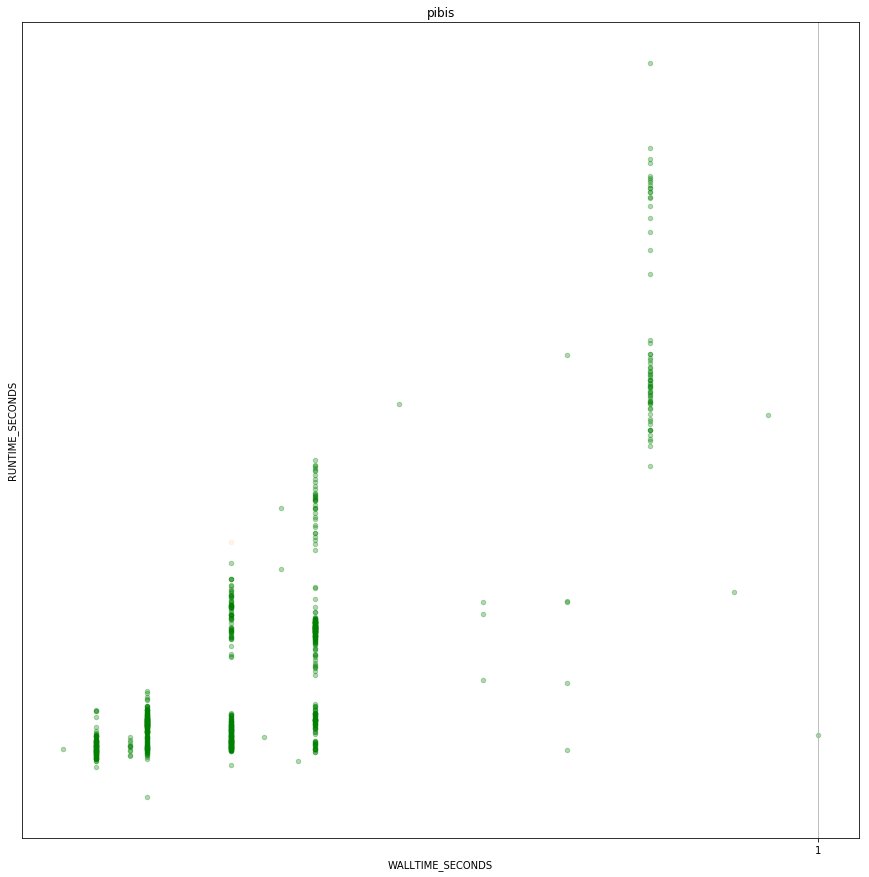

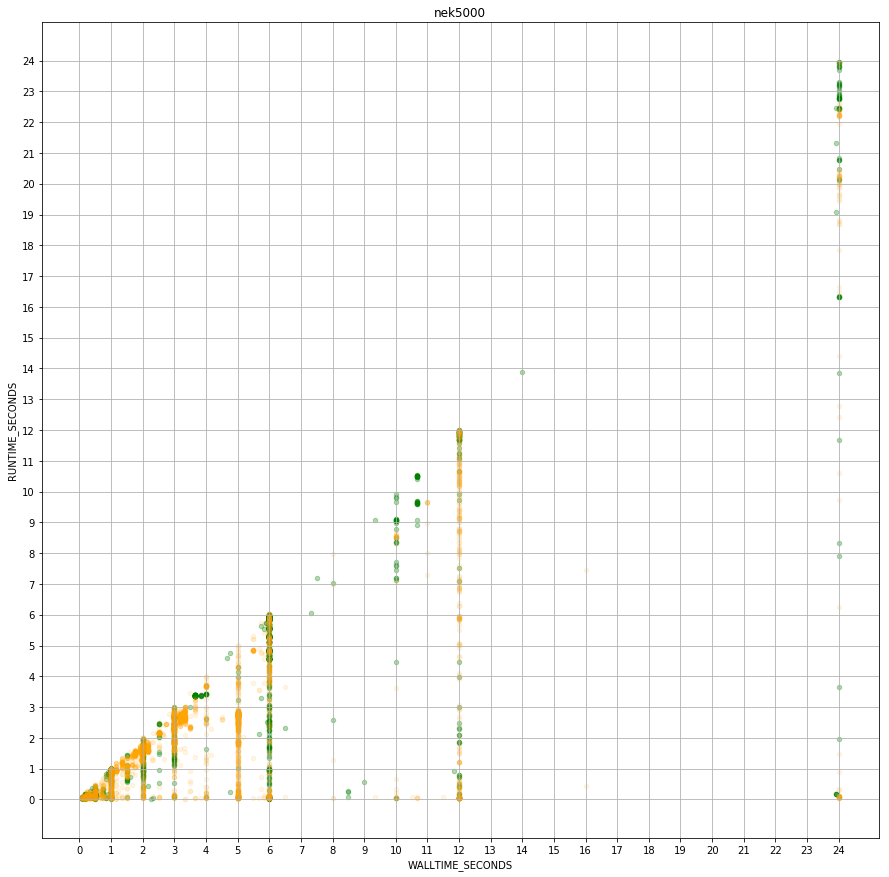

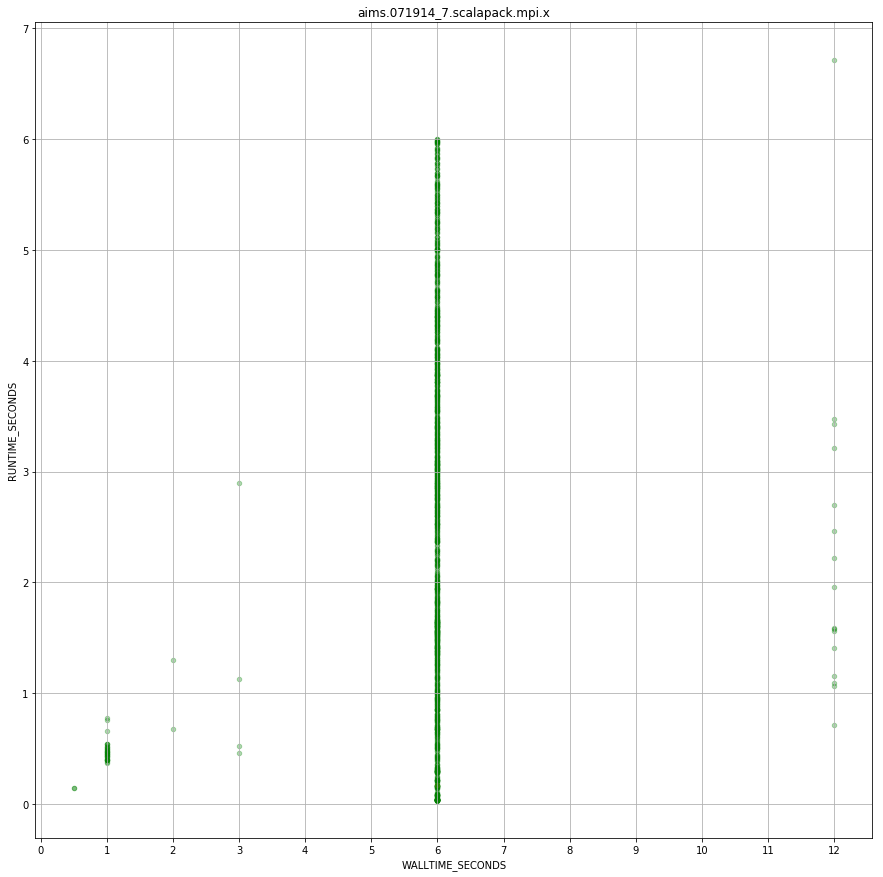

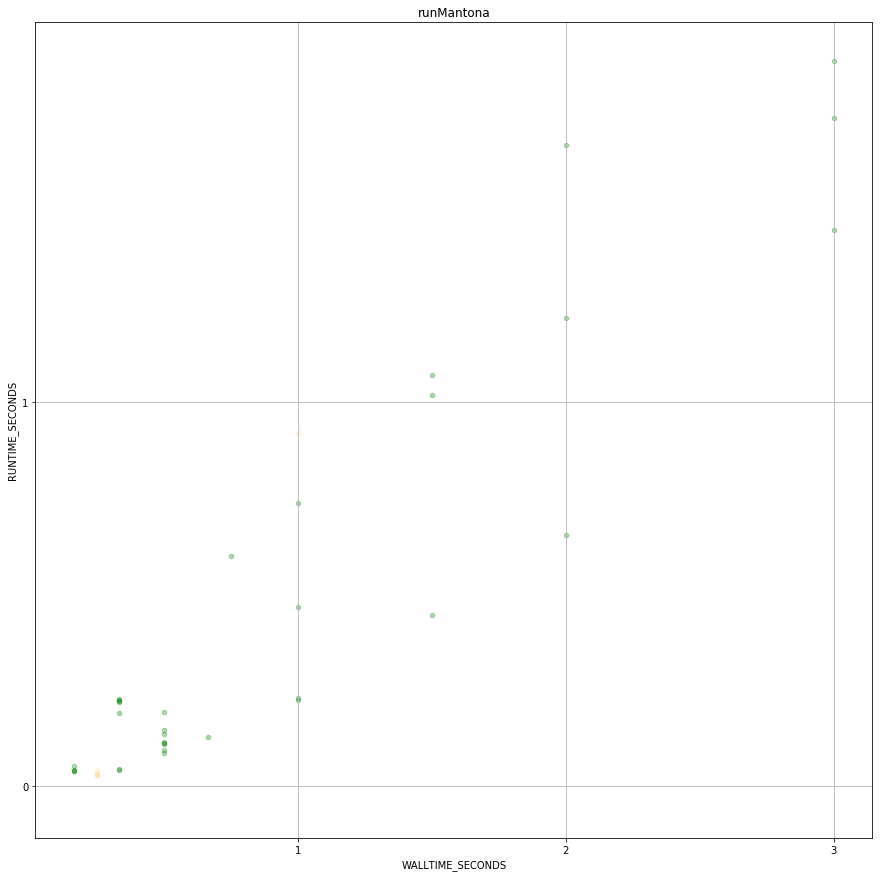

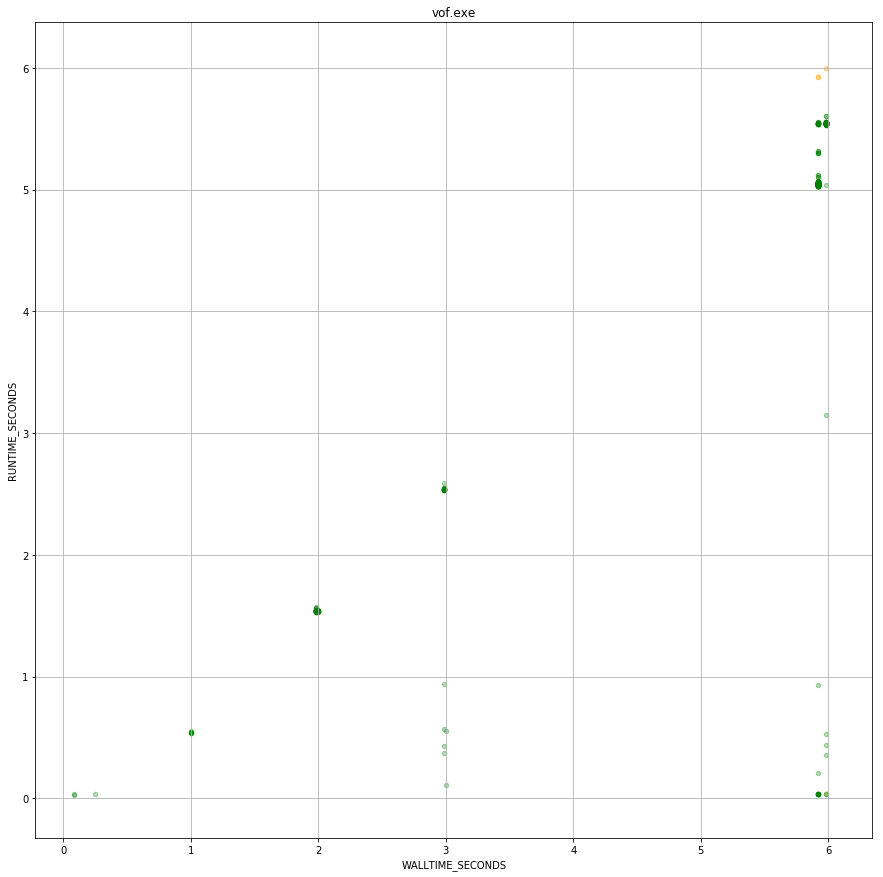

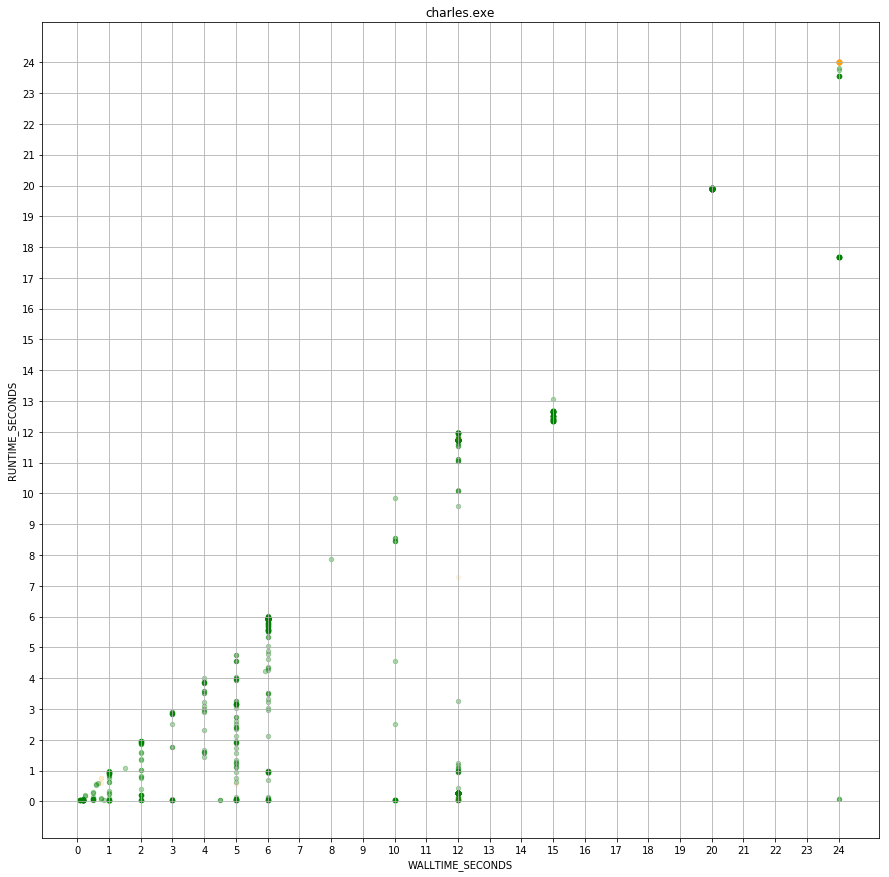

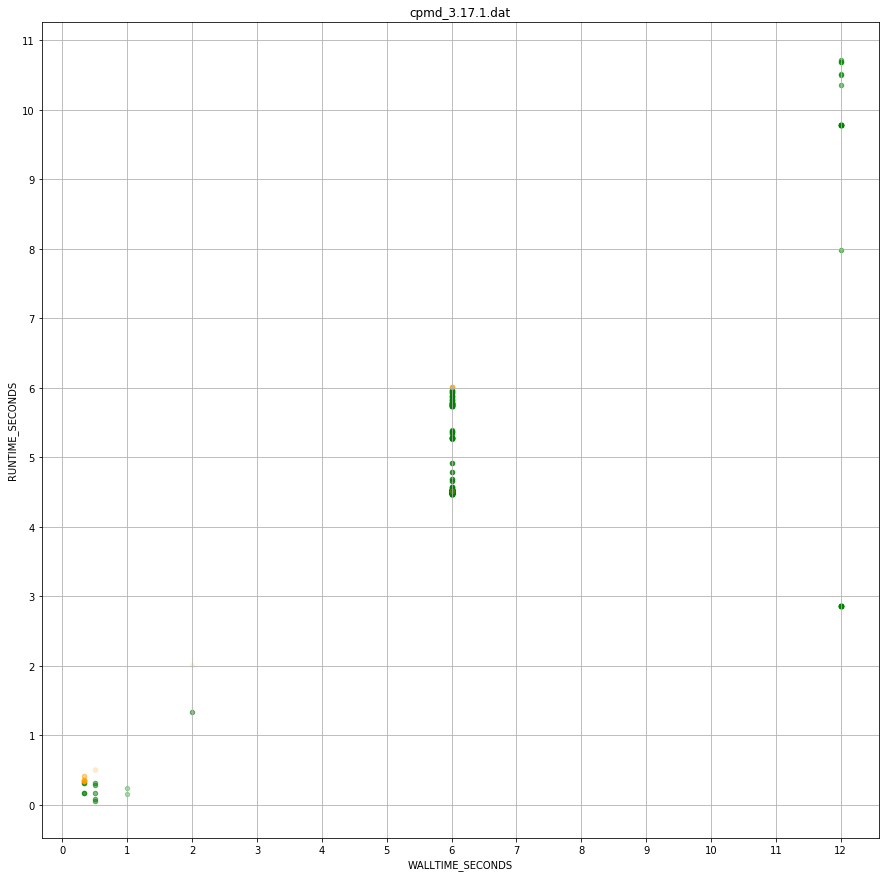

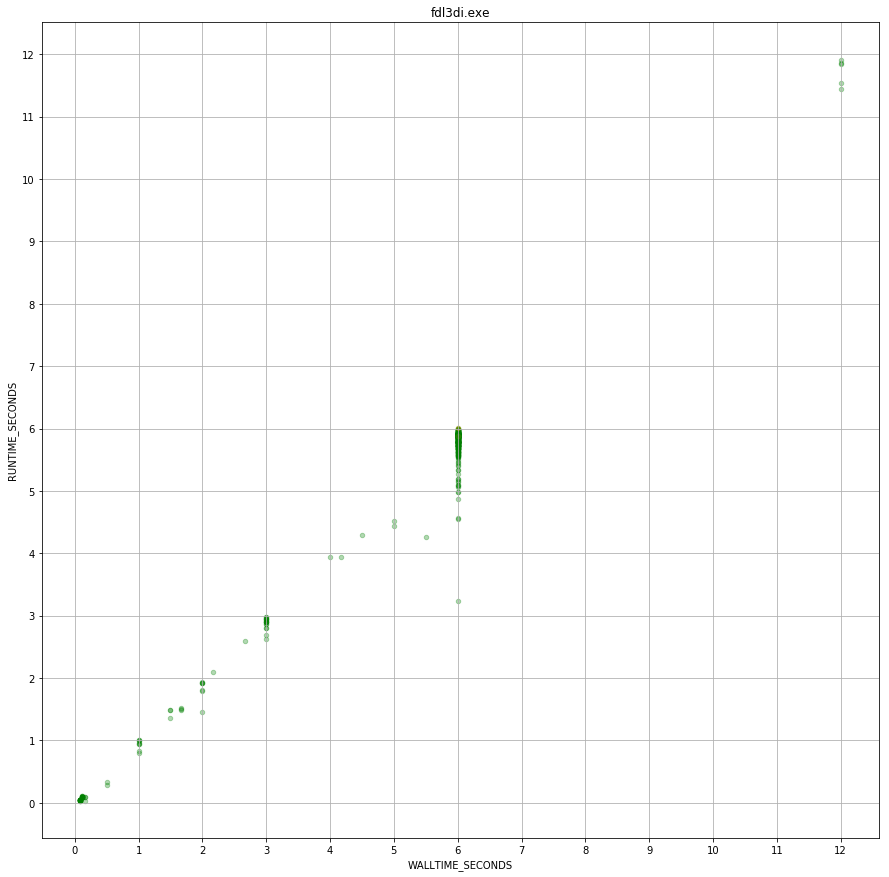

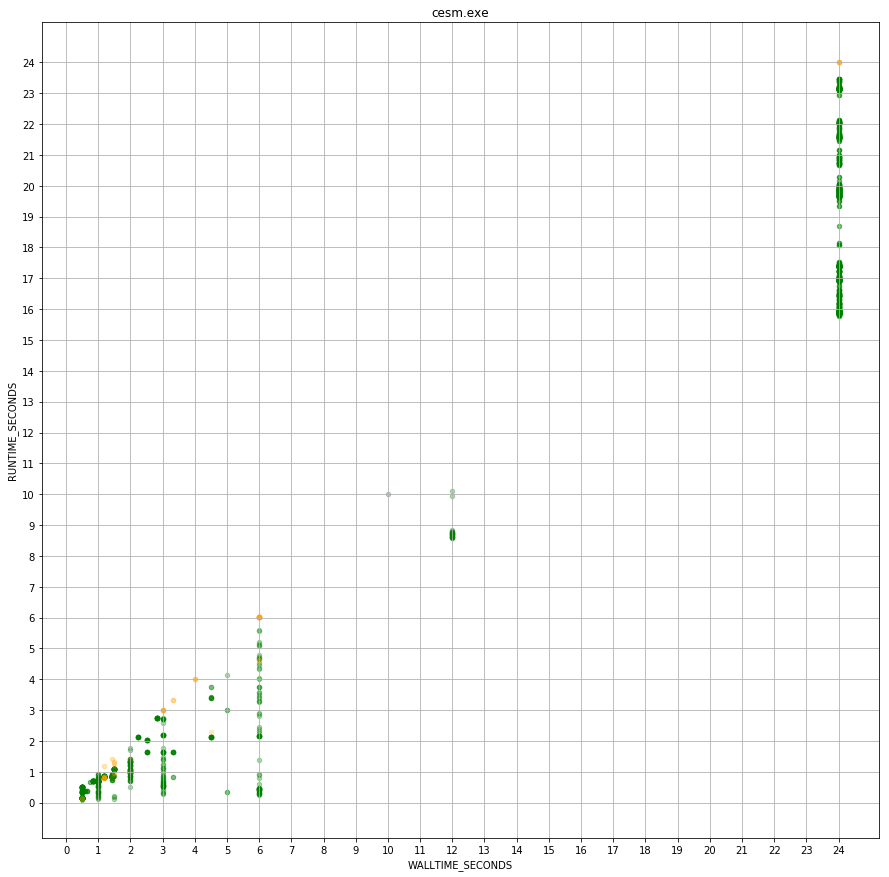

In [9]:
%matplotlib inline
for i in range(9):
    plotdf = df[df.zero_execName == df.zero_execName.unique()[i]]
    exit_cleandf = plotdf[plotdf['EXIT_STATUS'] == 0].append(plotdf[plotdf['EXIT_STATUS'] > 255])
    exit_faildf = pd.concat([plotdf, exit_cleandf, exit_cleandf]).drop_duplicates(keep=False)
    ax = exit_cleandf.plot(x='WALLTIME_SECONDS', y='RUNTIME_SECONDS', kind='scatter', title=df.zero_execName.unique()[i],
               xticks=range(25),
               yticks=range(25),
               figsize=(15,15),
               alpha=.3,
               color='Green',
               grid=True)
    exit_faildf.plot(x='WALLTIME_SECONDS', y='RUNTIME_SECONDS', kind='scatter', title=df.zero_execName.unique()[i],
               alpha=.1,
               ax = ax,
               color='Orange',
                    grid=True)
#     plt.scatter(plotdf.WALLTIME_SECONDS, plotdf.RUNTIME_SECONDS);
#     plt.title(df.zero_execName.unique()[i])

/home/luckierdodge/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:29: RankWarning: Polyfit may be poorly conditioned
/home/luckierdodge/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:29: RankWarning: Polyfit may be poorly conditioned
/home/luckierdodge/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:29: RankWarning: Polyfit may be poorly conditioned
/home/luckierdodge/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:29: RankWarning: Polyfit may be poorly conditioned
/home/luckierdodge/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:29: RankWarning: Polyfit may be poorly conditioned
/home/luckierdodge/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:29: RankWarning: Polyfit may be poorly conditioned
/home/luckierdodge/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:29: RankWarning: Polyfit may be poorly conditioned
/home/luckierdodge/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:29: RankWar

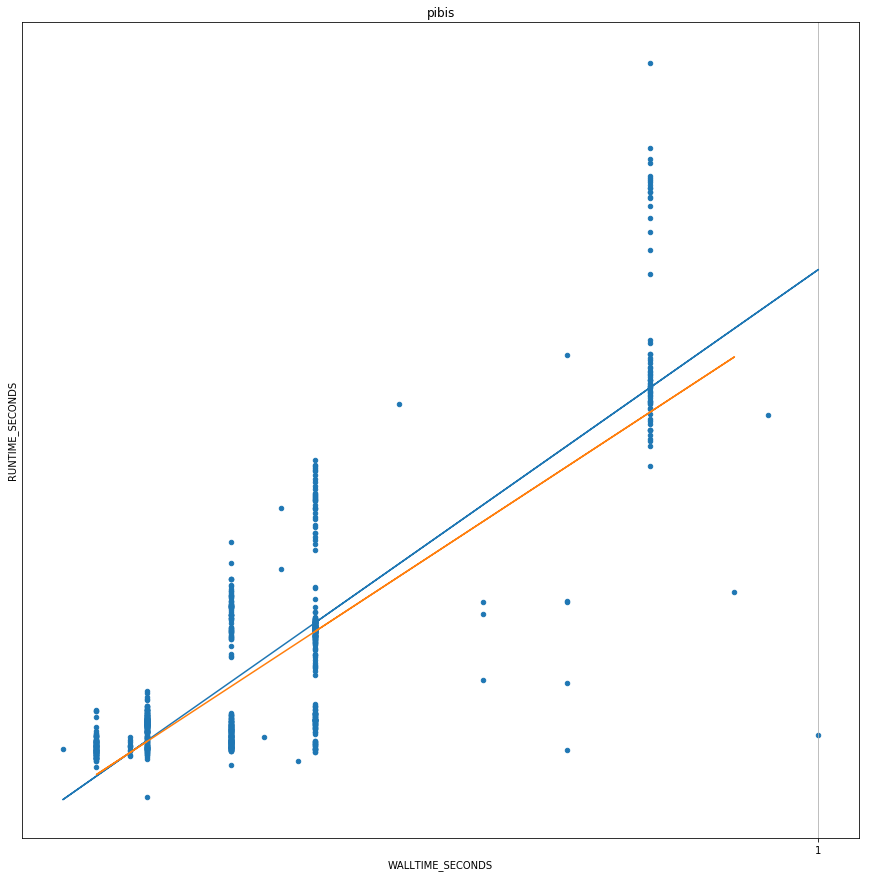

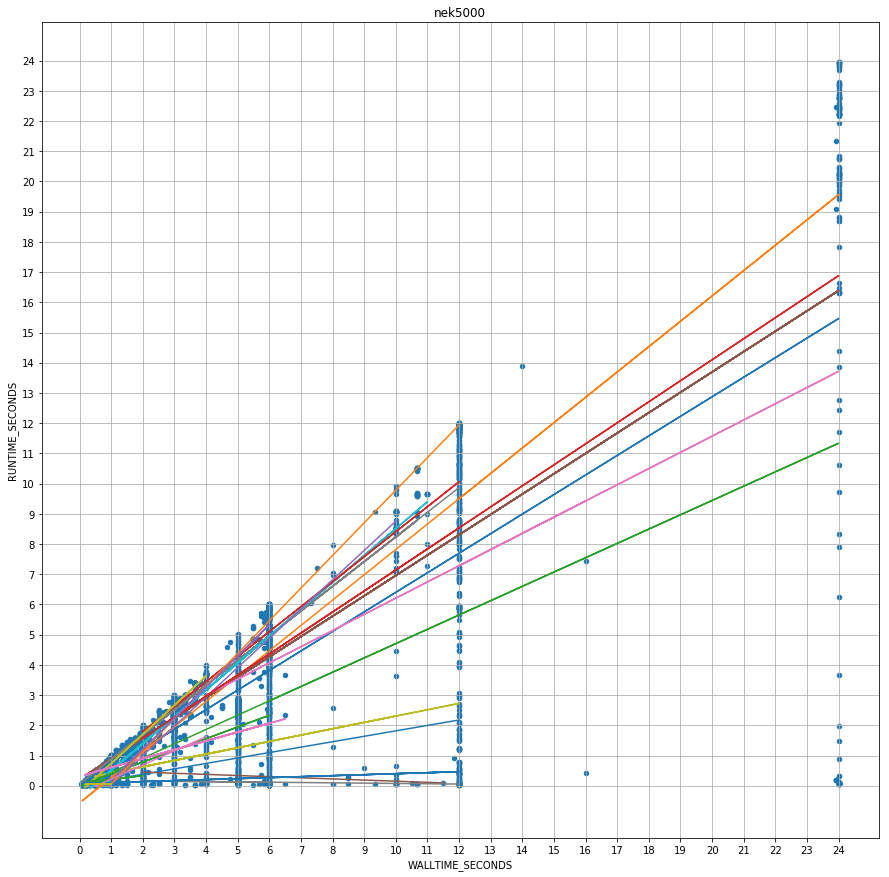

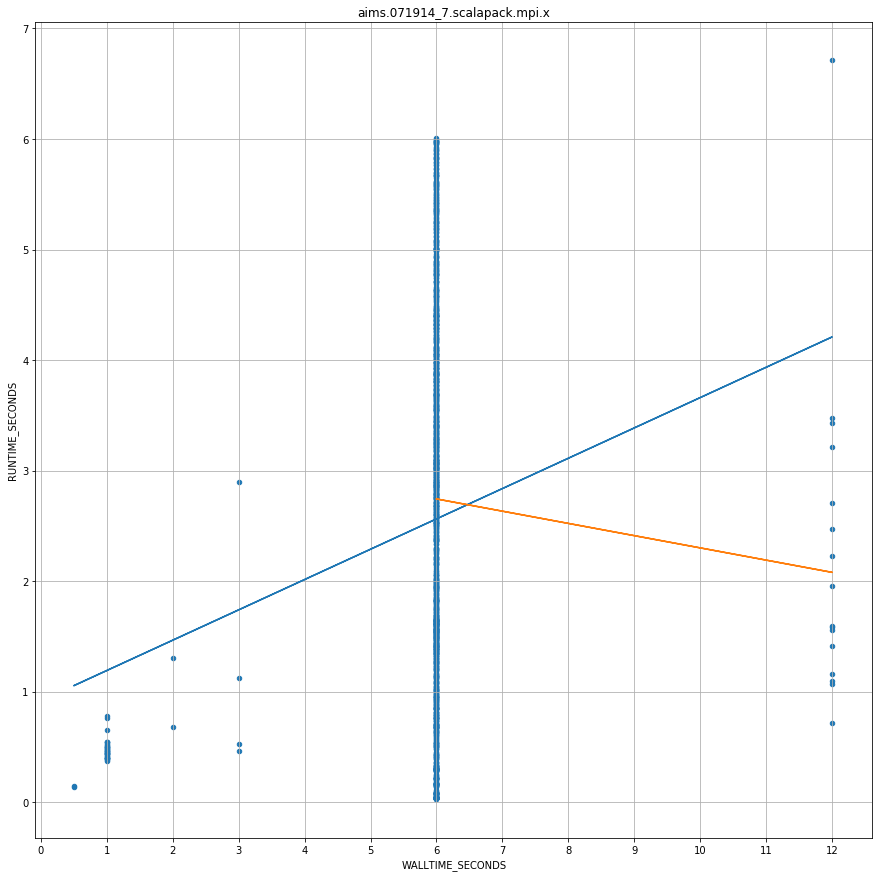

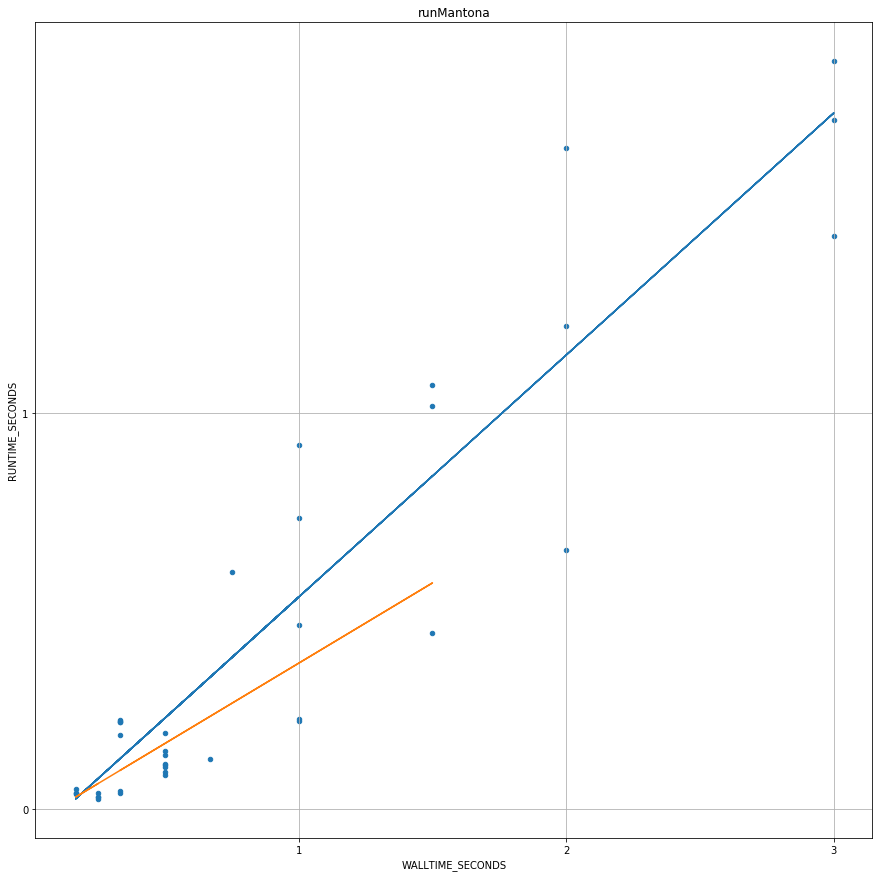

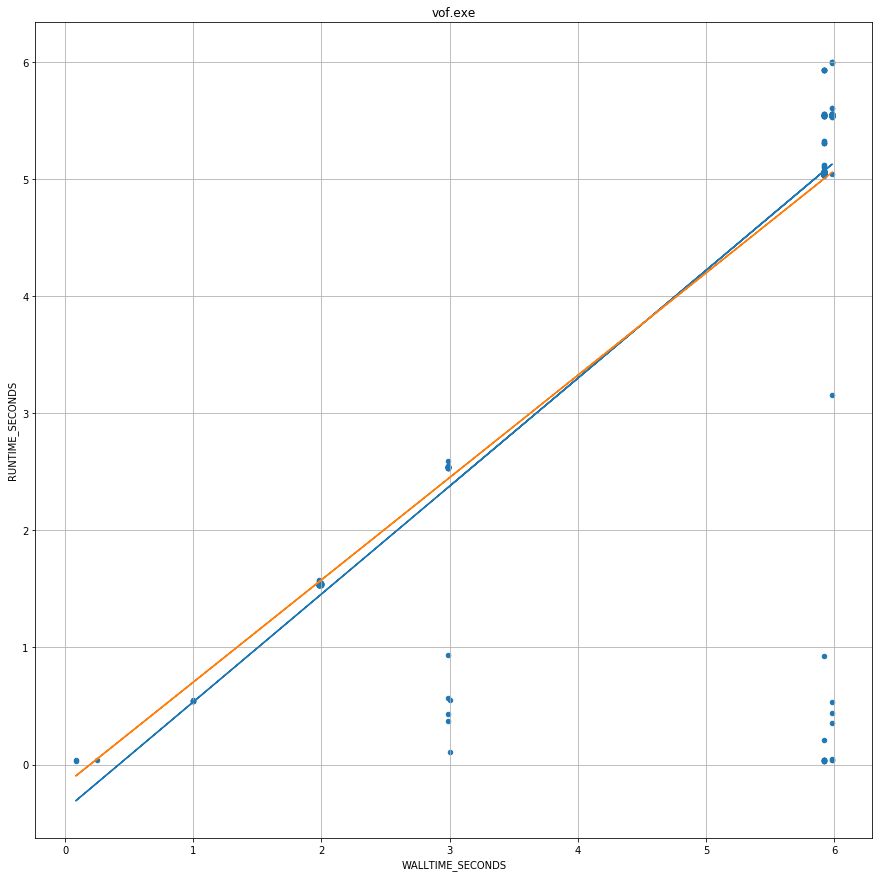

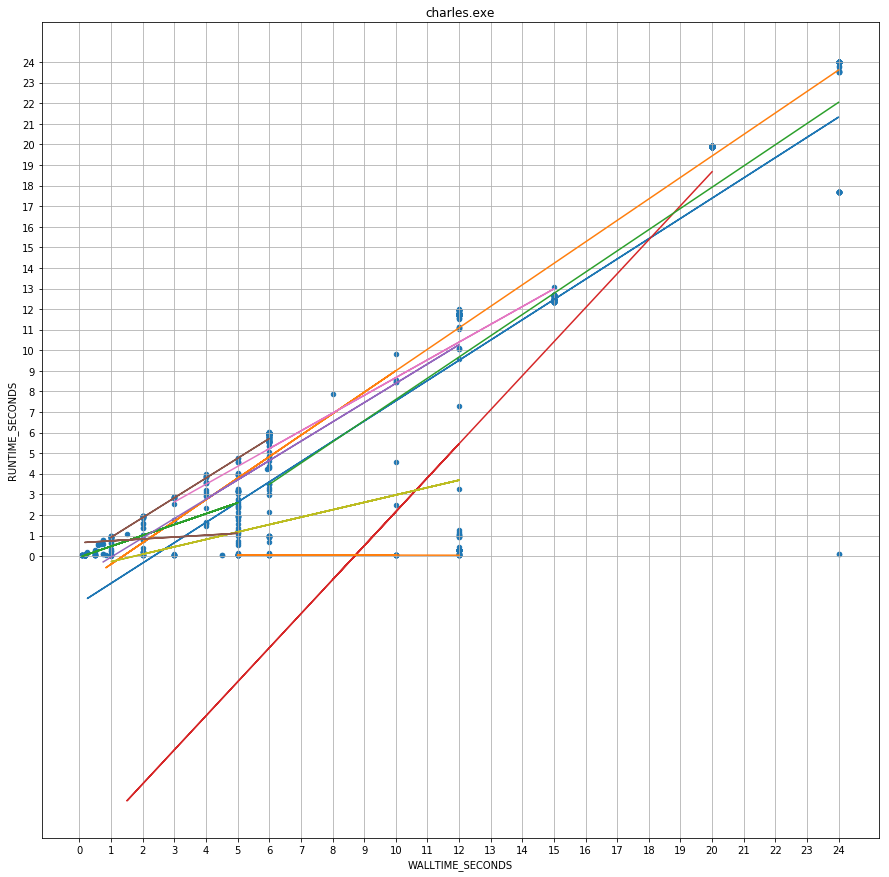

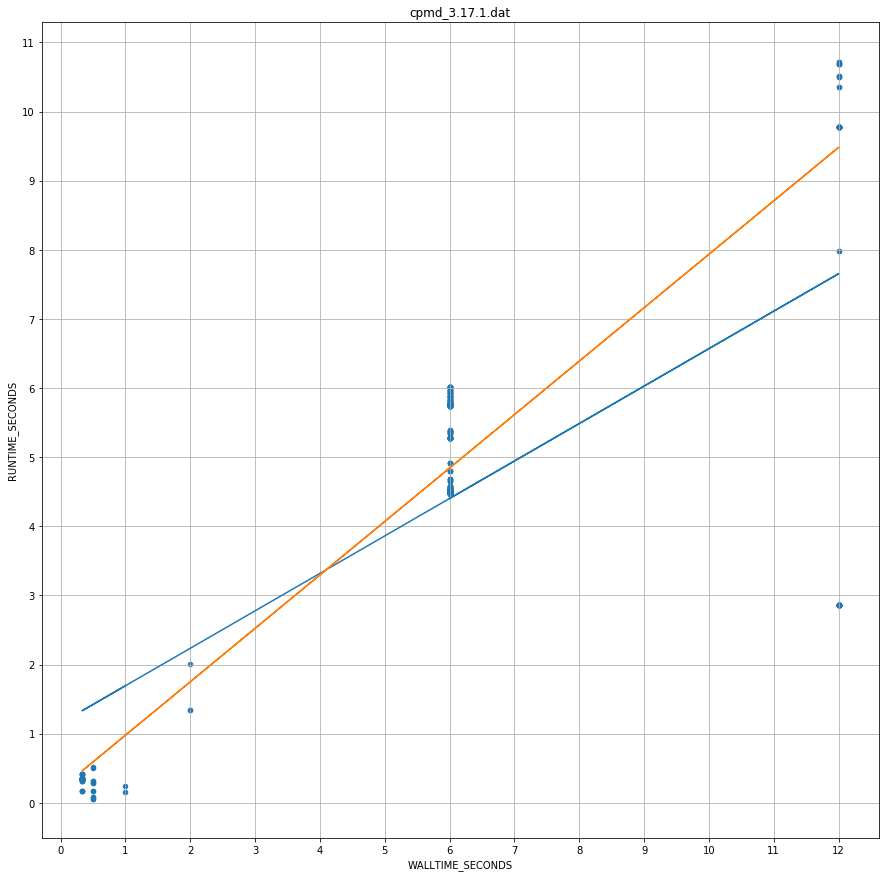

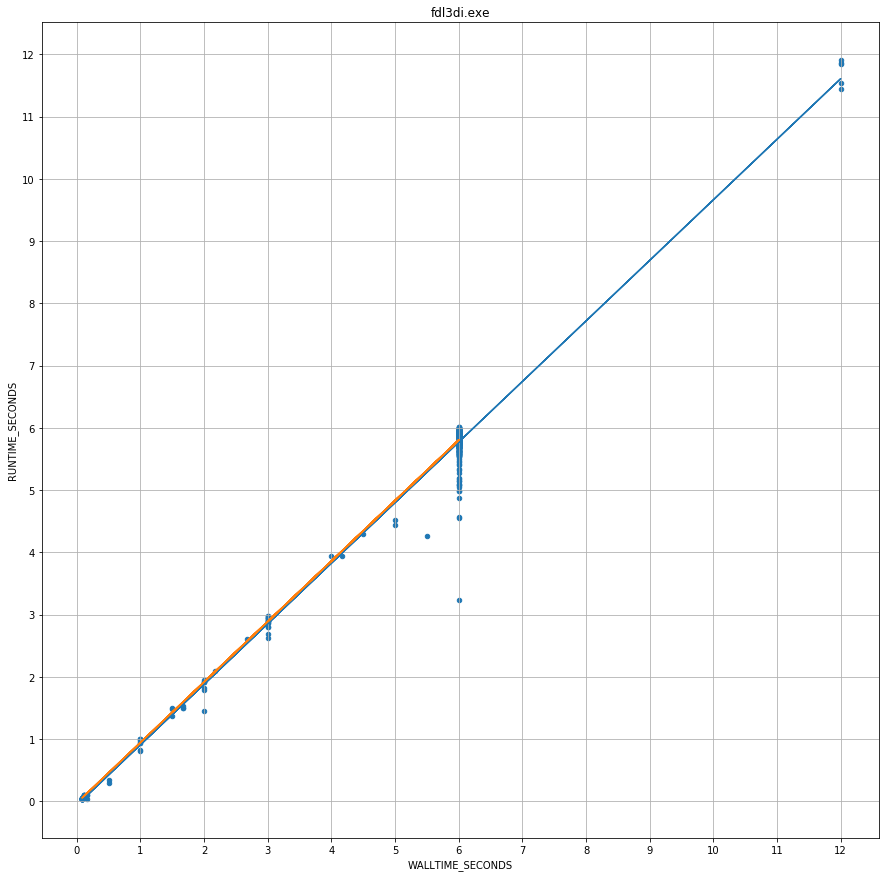

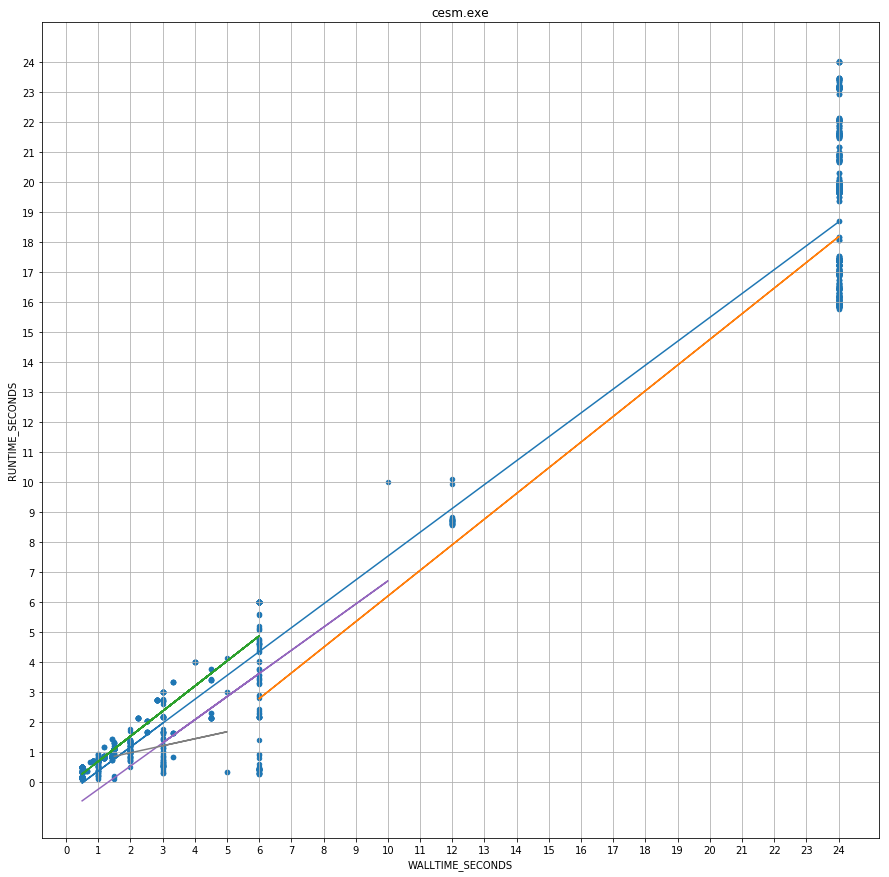

In [10]:
%matplotlib inline
colors = cm.rainbow(np.linspace(0, 1, len(df.zero_userName.unique())))
for i in range(9):
    plotdf = df[df.zero_execName == df.zero_execName.unique()[i]]
    userids = plotdf.zero_userName.unique()
    j = -1
    for uname in userids:
        j += 1
        if j == 0:
            userdf = plotdf[plotdf.zero_userName == userids[j]].copy()
            ax = userdf.plot(x='WALLTIME_SECONDS', y='RUNTIME_SECONDS', kind='scatter', title=df.zero_execName.unique()[i],
                       xticks=range(25),
                       yticks=range(25),
                       figsize=(15,15),
#                        alpha=.5,
#                        color=colors[j],
                       grid=True,
                       legend=False)
            lm_original = np.polyfit(userdf.WALLTIME_SECONDS, userdf.RUNTIME_SECONDS, 1)
            r_x, r_y = zip(*((k, k*lm_original[0] + lm_original[1]) for k in userdf.WALLTIME_SECONDS))
            lm_original_plot = pd.DataFrame({'WALLTIME_SECONDS': r_x, 'RUNTIME_SECONDS': r_y})
            lm_original_plot.plot(x='WALLTIME_SECONDS', y='RUNTIME_SECONDS', kind='line', title=df.zero_execName.unique()[i],
                       ax=ax,
#                        color=colors[j],
                       grid=True,
                       legend=False)
        else:
            userdf = plotdf[plotdf.zero_userName == uname].copy()
            lm_original = np.polyfit(userdf.WALLTIME_SECONDS, userdf.RUNTIME_SECONDS, 1)
            r_x, r_y = zip(*((k, k*lm_original[0] + lm_original[1]) for k in userdf.WALLTIME_SECONDS))
            lm_original_plot = pd.DataFrame({'WALLTIME_SECONDS': r_x, 'RUNTIME_SECONDS': r_y})
            userdf.plot(x='WALLTIME_SECONDS', y='RUNTIME_SECONDS', kind='scatter', title=df.zero_execName.unique()[i],
#                        alpha=.5,
                       ax = ax,
#                        color=colors[j],
                       grid=True,
                       legend=False)
            lm_original_plot.plot(x='WALLTIME_SECONDS', y='RUNTIME_SECONDS', kind='line', title=df.zero_execName.unique()[i],
                       ax=ax,
#                        color=colors[j],
                       grid=True,
                       legend=False)

In [11]:
# rows = []
# # result = pd.DataFrame(columns=['name', 'ranks', 'procs', 't_mean', 't_std'])
# for name in df.zero_execName.unique():
#     df_name = df[df['zero_execName'] == name]
#     for num_ranks in df_name.zero_numRanks.unique():
#         df_name_rank = df_name[df_name['zero_numRanks'] == num_ranks]
#         for num_proc in df_name_rank.av_numProcessesOnNode.unique():
#             avElapsedTime = df_name_rank[df_name_rank['av_numProcessesOnNode'] == num_proc].zero_elapsedTime.mean()
#             stdElapsedTime = df_name_rank[df_name_rank['av_numProcessesOnNode'] == num_proc].zero_elapsedTime.std()
#             count = df_name_rank[df_name_rank['av_numProcessesOnNode'] == num_proc].shape[0]
#             rows.append({
#                 'name': name,
#                 'ranks': num_ranks,
#                 'procs': num_proc,
#                 't_mean': avElapsedTime,
#                 't_std': stdElapsedTime,
#                 'num': count
#             })
# #             result.append([name, num_ranks, num_proc, avElapsedTime], inplace=True)
# result = pd.DataFrame(rows)
# result.describe()

In [12]:
# %matplotlib inline
# plt.figure(figsize=(20,15))
# # plt.scatter(result.name, result.t_std / result.t_mean)
# plt.scatter(result.name, result.t_std)